In [ ]:

import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
file_path = '/content/LAST_BLUE_Yellow_PINK_RUBY_WHITE_GREEN_Purple_Padpashcah_Dataset.csv'

# Load the dataset
df = pd.read_csv(file_path, dtype={'image_name_helper': str})


# Print the number of columns in the dataset
print(f"Number of columns in the dataset: {len(df.columns)}")

# Print all column names
print("Columns in the dataset:")
for col in df.columns:
    print(col)


irrelevant_columns = [
    'ns_id', 'total_price', 'carat', 'price_per_carat',
    'length', 'width', 'height', 'origin',  'image1', 'image2', 'image3'
]

# Drop irrelevant columns
df = df.drop(columns=irrelevant_columns)

# Print the number of remaining columns in the DataFrame
print(f"Number of columns after dropping irrelevant ones: {len(df.columns)}")

# Print the remaining columns
print("Remaining columns in the DataFrame:", df.columns.tolist())

X = df.drop(columns=['color', 'clarity', 'cut'])  # Features (input variables)
y = df[['color', 'clarity', 'cut']]  # Target variables

# Save the dataset with target variables separated into a new CSV file
df_target_separated = pd.concat([X, y], axis=1)  # Combine the features and target variables
df_target_separated.to_csv('separated_target_variables.csv', index=False)  # Save to a new CSV file

# Histogram

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path

# Get numeric columns
num_cols = df.select_dtypes(include="number").columns

# Define number of rows and columns for subplots
num_plots = len(num_cols)
cols = 3  # Number of columns per row (adjust as needed)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes array to easily iterate

# Loop through numeric columns and plot
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots (if number of plots is less than grid size)
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<ipython-input-2-9660545a71f2>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path


# Boxplots

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Define the number of rows and columns for subplots
num_cols_count = len(num_cols)
cols = 3  # Number of columns per row
rows = int(np.ceil(num_cols_count / cols))  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots
for i in range(num_cols_count, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-3-858d23922766>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")  # Replace with your actual file path


# Scatter plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
# List of numerical columns
numerical_columns = [
    "Avg Red", "Avg Green", "Avg Blue", "Contrast", "Homogeneity", "Energy", "Correlation",
    "Edge_Density", "Intensity_Variance", "Hue_Std", "Saturation_Std", "Aspect_Ratio",
    "Perimeter", "Area", "Circularity", "Convexity", "Edge_Sharpness", "Symmetry",

    # R Histogram Bins
    *[f"R Hist Bin Agg {i}" for i in range(64)],

    # G Histogram Bins
    *[f"G Hist Bin Agg {i}" for i in range(64)],

    # B Histogram Bins
    *[f"B Hist Bin Agg {i}" for i in range(64)],

    # Statistical Features
    "R_Mean", "R_StdDev", "R_Skewness", "R_Kurtosis",
    "G_Mean", "G_StdDev", "G_Skewness", "G_Kurtosis",
    "B_Mean", "B_StdDev", "B_Skewness", "B_Kurtosis"
]

# Categorical target variables
categorical_columns = ["color", "clarity", "cut"]

# Loop through each numerical column and plot scatter plots
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        plt.figure(figsize=(6, 4))  # Set figure size
        sns.scatterplot(data=df, x=num_col, y=cat_col)
        plt.title(f"Scatter Plot: {num_col} vs {cat_col}")  # Title for clarity
        plt.xlabel(num_col)
        plt.ylabel(cat_col)
        plt.show()

# Correlation matrix

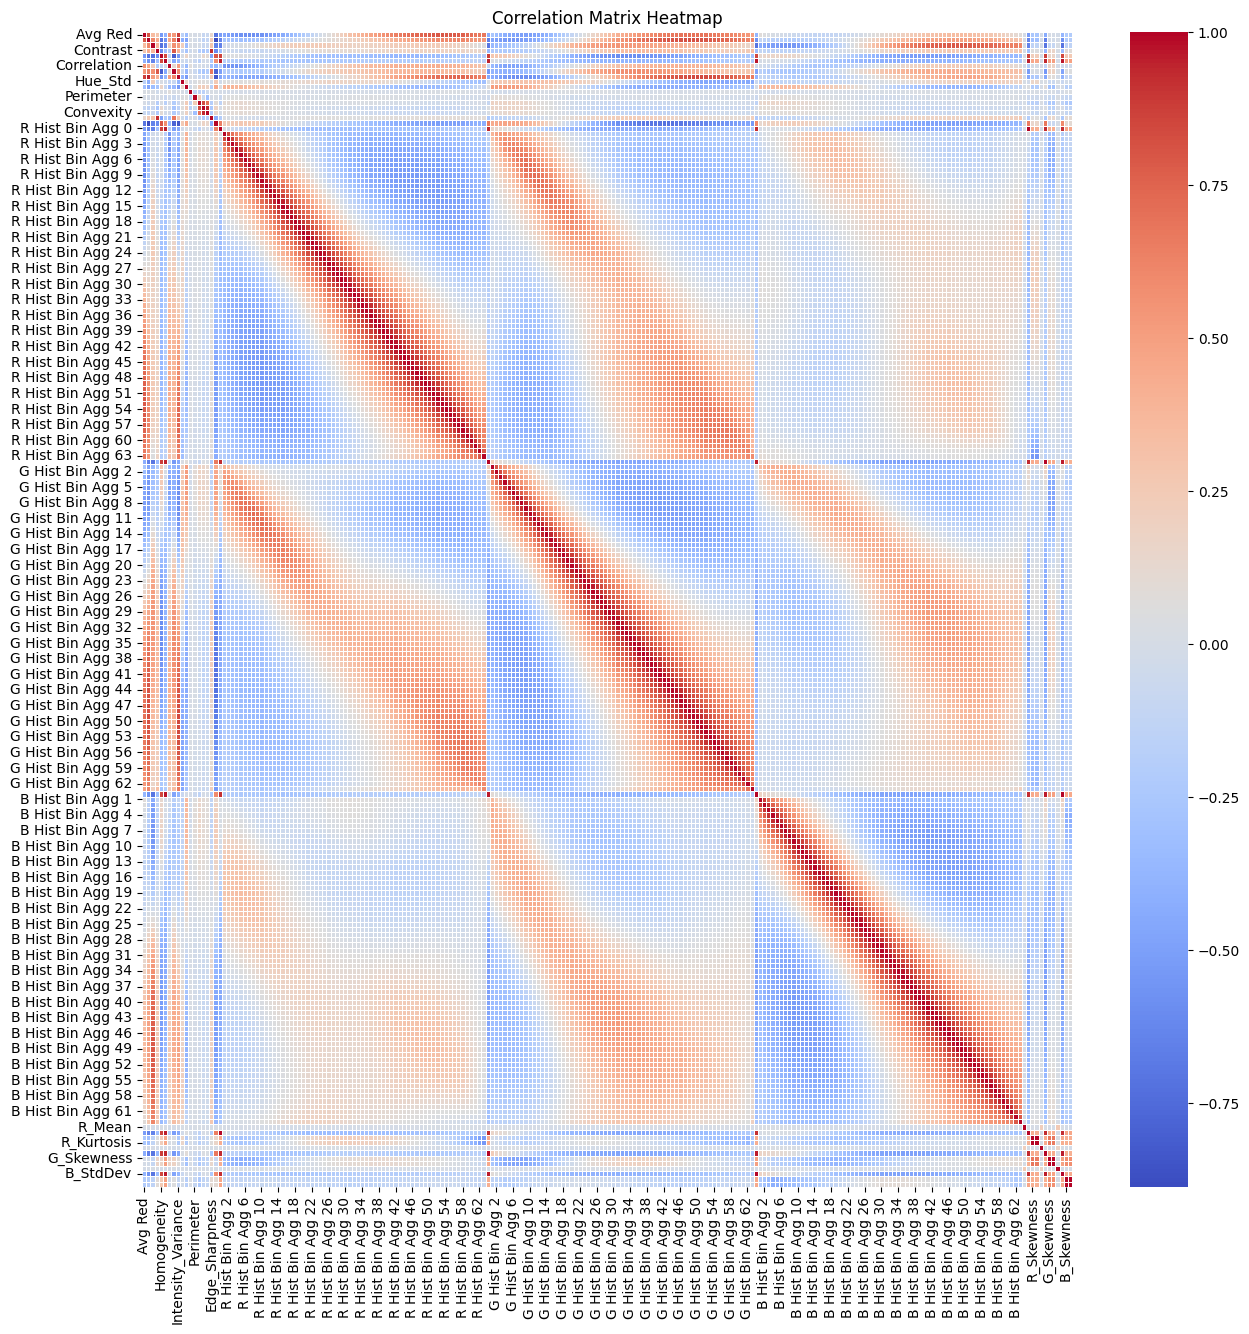

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Display the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Check Missing Values

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('separated_target_variables.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# Handling Missing Values  part 01

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Load dataset
df = pd.read_csv("separated_target_variables.csv")

# Identify columns for different imputation techniques
median_columns = ['Avg Green', 'Avg Blue', 'Correlation', 'Saturation_Std', 'Area', 'G_Kurtosis', 'B_Kurtosis']
mean_columns = ['Homogeneity', 'Energy','Symmetry','R Hist Bin Agg 0','G Hist Bin Agg 0','B Hist Bin Agg 0',
                'R_Mean','R_StdDev','G_Mean','G_StdDev','B_Mean','B_StdDev']
mode_columns = [
    'R Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'G Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'B Hist Bin Agg ' + str(i) for i in range(1, 64)] + [
    'Edge_Density','Aspect_Ratio','Edge_Sharpness']
knn_columns = ['Avg Red','Contrast', 'Hue_Std', 'Intensity_Variance','Perimeter',
               'Circularity','Convexity','R_Skewness','R_Kurtosis','G_Skewness','B_Skewness']

# Apply Median Imputation
df[median_columns] = df[median_columns].apply(lambda x: x.fillna(x.median()))

# Apply Mean Imputation
df[mean_columns] = df[mean_columns].apply(lambda x: x.fillna(x.mean()))

# Apply Mode Imputation
def mode_imputation(column):
    return column.fillna(column.mode()[0]) if not column.mode().empty else column

df[mode_columns] = df[mode_columns].apply(mode_imputation)

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)

print("Missing values handled and dataset saved successfully.")

<ipython-input-7-f5903d4eb0f0>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("separated_target_variables.csv")


Missing values handled and dataset saved successfully.


# Handle Missing Values Part 02

In [ ]:
import pandas as pd

# Read the CSV file (replace with your actual file path)
df = pd.read_csv('cleaned_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = df.drop(columns=['color', 'clarity', 'cut'])  # Features
y = df[['color', 'clarity', 'cut']]  # Target variables

# 1. Check for missing values in features (X)
missing_values_features = X.isnull().sum()

# Print missing values for features (X)
print("Missing values in features (X):")
for column, missing_count in missing_values_features.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

# 2. Check for missing values in target variables (y)
missing_values_target = y.isnull().sum()

# Print missing values for target variables (y)
print("\nMissing values in target variables (y):")
for column, missing_count in missing_values_target.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('cleaned_dataset.csv', low_memory=False)

# Specify the columns for missing value handling
numerical_columns = ['color_intensity_score', 'cut_asscher','cut_brilliant','cut_carving','cut_emerald cut','cut_fancy brilliant','cut_fancy cut','cut_french cut','cut_mixed brilliant','cut_modified brilliant','cut_princess cut','cut_radiant cut','cut_scissor cut','cut_step cut','cut_trillion cut']  # Add numerical columns
categorical_columns = ['color_group']  # Add categorical columns

# Handling missing values in numerical columns using median imputation
numerical_imputer = SimpleImputer(strategy='median')
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Handling missing values in categorical columns using most frequent (mode) imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])

# Check for any remaining missing values
missing_values = data[numerical_columns + categorical_columns].isnull().sum()
print("Missing values after imputation:\n", missing_values)

# Save the cleaned dataset
data.to_csv('color_cut_clarity_cleaned_dataset.csv', index=False)

Missing values after imputation:
 color_intensity_score     0
cut_asscher               0
cut_brilliant             0
cut_carving               0
cut_emerald cut           0
cut_fancy brilliant       0
cut_fancy cut             0
cut_french cut            0
cut_mixed brilliant       0
cut_modified brilliant    0
cut_princess cut          0
cut_radiant cut           0
cut_scissor cut           0
cut_step cut              0
cut_trillion cut          0
color_group               0
dtype: int64


# Outlier Treatments

In [ ]:
import pandas as pd

# Read CSV file
df = pd.read_csv("/content/color_cut_clarity_cleaned_dataset.csv")  # Replace with your actual file path

# Select numerical columns
num_cols = df.select_dtypes(include="number").columns

# Identify continuous numerical columns
continuous_cols = [col for col in num_cols if df[col].nunique() > 20]  # Threshold of 20 unique values

print("Continuous Numerical Columns:", continuous_cols)

print("Number of Continuous Numerical Columns:", len(continuous_cols))

<ipython-input-10-fe59f2dae58e>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/color_cut_clarity_cleaned_dataset.csv")  # Replace with your actual file path


Continuous Numerical Columns: ['Avg Red', 'Avg Green', 'Avg Blue', 'Contrast', 'Homogeneity', 'Energy', 'Correlation', 'Edge_Density', 'Intensity_Variance', 'Hue_Std', 'Saturation_Std', 'Aspect_Ratio', 'Perimeter', 'Area', 'Circularity', 'Convexity', 'Edge_Sharpness', 'Symmetry', 'R Hist Bin Agg 0', 'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5', 'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10', 'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15', 'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20', 'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25', 'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30', 'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Read the CSV file
df = pd.read_csv("/content/color_cut_clarity_cleaned_dataset.csv")  # Replace with your actual file path

# Step 2: Select only continuous numerical columns
# Continuous columns usually have float data types
continuous_num_cols = df.select_dtypes(include=['float64', 'float32']).columns

# Step 3: Function to detect outliers using the IQR method (Only for continuous numerical columns)
def detect_outliers_iqr(data, columns, threshold=1.5):
    outliers_dict = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = data[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

        # Store outliers if found
        if not outliers.empty:
            outliers_dict[col] = outliers

    return outliers_dict

# Step 4: Detect outliers in the dataset (only for continuous numerical columns)
outliers = detect_outliers_iqr(df, continuous_num_cols)

# Step 5: Replace outliers with the median value
def replace_outliers_with_median(data, outliers_dict):
    for col, outlier_values in outliers_dict.items():
        median_value = data[col].median()
        # Replace outliers with the median value
        data[col] = np.where(data[col].isin(outlier_values), median_value, data[col])
    return data

# Replace outliers with the median value (only for continuous numerical columns)
df_cleaned = replace_outliers_with_median(df.copy(), outliers)

# Step 6: Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("/content/cleaned_dataset_no_outliers.csv", index=False)

# Step 7: Check if any outliers remain in the cleaned dataset
outliers_after_cleaning = detect_outliers_iqr(df_cleaned, continuous_num_cols)

# Print results
if not outliers_after_cleaning:
    print("No outliers found in the cleaned dataset.")
else:
    for col, outlier_values in outliers_after_cleaning.items():
        print(f"Outliers still present in {col}:")
        print(outlier_values)
        print("\n")

# Duplicates

In [ ]:
# Check for duplicates based on specific columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the duplicate rows
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
duplicate_rows

Total duplicate rows based on selected columns: 210


image_name_helper                   type              shape  \
52                   60          Blue Sapphire  Asscher - Octagon   
53                   60          Blue Sapphire  Asscher - Octagon   
1131               1140          Blue Sapphire               Oval   
1132               1140          Blue Sapphire               Oval   
1188               1197          Blue Sapphire              Round   
...                 ...                    ...                ...   
12411            S12599  Padparadscha Sapphire               Oval   
12412            S12595  Padparadscha Sapphire            Cushion   
12413             S7963  Padparadscha Sapphire               Oval   
12414             S4906  Padparadscha Sapphire            Cushion   
12415             S7856  Padparadscha Sapphire               Oval   

      color_intensity       treatment   color_group  color_group_blue  \
52            Intense          Heated          Blue               1.0   
53            Intense          Heated          Blue               1.0   
1131          Intense          Heated          Blue               1.0   
1132          Intense          Heated          Blue               1.0   
1188           Medium  No Enhancement          Blue               1.0   
...               ...             ...           ...               ...   
12411         Intense  No Enhancement  Padparadscha               0.0   
12412          Medium  No Enhancement  Padparadscha               0.0   
12413  Medium Intense  No Enhancement  Padparadscha               0.0   
12414    Medium Light  No Enhancement  Padparadscha               0.0   
12415         Intense  No Enhancement  Padparadscha               0.0   

       color_group_blue-grey  color_group_blue-purple  color_group_brown-pink  \
52                       0.0                      0.0                     0.0   
53                       0.0                      0.0                     0.0   
1131                     0.0                      0.0                     0.0   
1132                     0.0                      0.0                     0.0   
1188                     0.0                      0.0                     0.0   
...                      ...                      ...                     ...   
12411                    0.0                      0.0                     0.0   
12412                    0.0                      0.0                     0.0   
12413                    0.0                      0.0                     0.0   
12414                    0.0                      0.0                     0.0   
12415                    0.0                      0.0                     0.0   

       ...  G_StdDev  G_Skewness  G_Kurtosis    B_Mean  B_StdDev  B_Skewness  \
52     ...  0.025601    7.990559   63.897253  0.003906  0.025593    7.996678   
53     ...  0.025601    7.990559   63.897253  0.003906  0.025593    7.996678   
1131   ...  0.023990    7.985266   63.839858  0.003906  0.023606    7.986611   
1132   ...  0.023990    7.985266   63.839858  0.003906  0.023606    7.986611   
1188   ...  0.021899    7.968682   63.659914  0.003906  0.021906    7.960611   
...    ...       ...         ...         ...       ...       ...         ...   
12411  ...  0.024459    7.981678   63.800799  0.003906  0.024452    7.990374   
12412  ...  0.021990    7.971845   63.693656  0.003906  0.021982    7.982168   
12413  ...  0.023411    7.975441   63.732961  0.003906  0.023407    7.980515   
12414  ...  0.020151    7.925956   63.193847  0.003906  0.020135    7.946233   
12415  ...  0.022354    7.957208   63.533722  0.003906  0.022344    7.969269   

       B_Kurtosis                                          color  \
52      63.964018                                           Blue   
53      63.964018                                           Blue   
1131    63.852990                                           Blue   
1132    63.852990                                           Blue   
1188    63.572069         

In [ ]:
import pandas as pd

# Load your dataset (if not already loaded)
df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path

# Remove duplicates based on selected columns, keeping only the first occurrence
df_cleaned = df.drop_duplicates(subset=['image_name_helper', 'type', 'shape'], keep='first')

# Reset index after removing duplicates
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv("remove_duplicates_dataset.csv", index=False)

print("Duplicates removed and dataset saved as 'cleaned_dataset.csv'")

<ipython-input-13-3b6e4eae5bb7>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_dataset_no_outliers.csv")  # Uncomment and replace with your file path


Duplicates removed and dataset saved as 'cleaned_dataset.csv'


In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("/content/remove_duplicates_dataset.csv")

# Check for duplicates based on selected columns
duplicate_rows = df[df.duplicated(subset=['image_name_helper', 'type', 'shape'], keep=False)]

# Display the number of duplicate rows and the duplicate data
print(f"Total duplicate rows based on selected columns: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Total duplicate rows based on selected columns: 0
Empty DataFrame
Columns: [image_name_helper, type, shape, color_intensity, treatment, color_group, color_group_blue, color_group_blue-grey, color_group_blue-purple, color_group_brown-pink, color_group_green, color_group_padparadscha, color_group_pink, color_group_pink-purple, color_group_pink-red, color_group_purple, color_group_purple-red, color_group_red, color_group_red-orange, color_group_white, color_group_yellow, color_group_yellow-brown, color_group_yellow-green, color_group_yellow-orange, color_group_nan, color_intensity_score, color_category, cut_asscher, cut_brilliant, cut_carving, cut_emerald cut, cut_fancy brilliant, cut_fancy cut, cut_french cut, cut_mixed brilliant, cut_modified brilliant, cut_princess cut, cut_radiant cut, cut_scissor cut, cut_step cut, cut_trillion cut, cut_group, clarity_Eye Clean, clarity_Included, clarity_Slightly Included, clarity_Very Slightly Included, clarity_score, clarity_group, Avg Red, Avg Gre

<ipython-input-14-10496d8c0621>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/remove_duplicates_dataset.csv")


# Handle Highly Skewed distribution

<ipython-input-15-c4883f04518d>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file


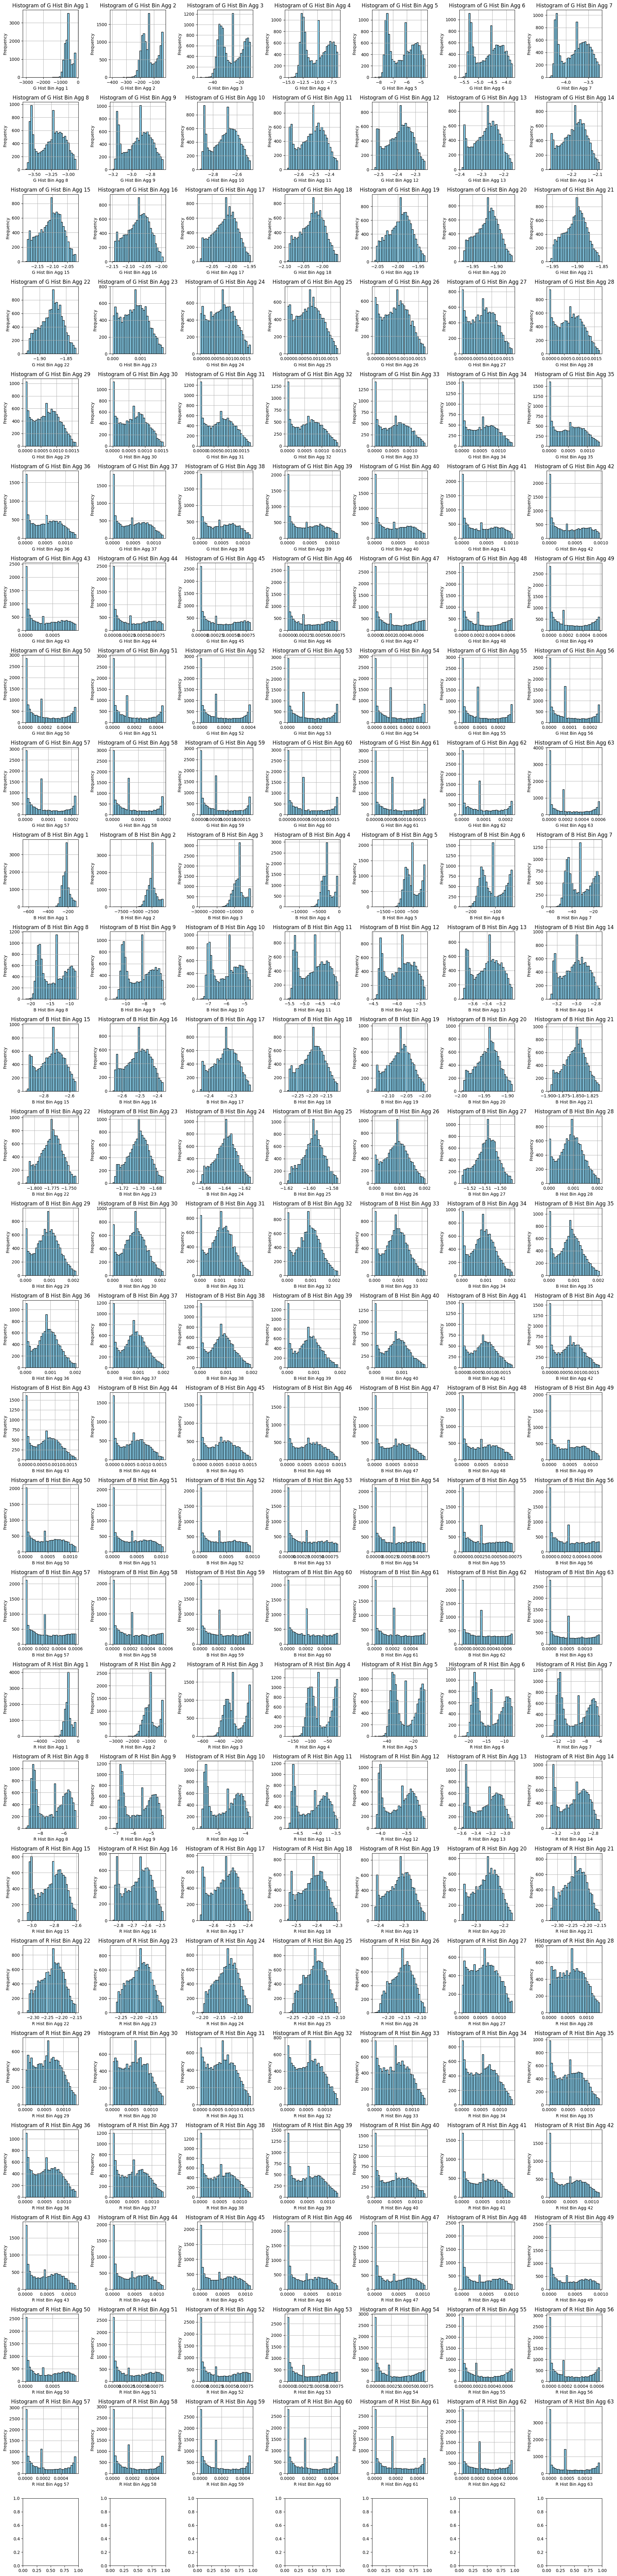

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Read CSV file
df = pd.read_csv('/content/remove_duplicates_dataset.csv')  # Replace with the actual path of your CSV file

# Step 2: Replace infinite values and drop NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Step 3: Green Channel: List of columns related to green channel intensity
green_columns = [
    'G Hist Bin Agg 1', 'G Hist Bin Agg 2', 'G Hist Bin Agg 3', 'G Hist Bin Agg 4', 'G Hist Bin Agg 5',
    'G Hist Bin Agg 6', 'G Hist Bin Agg 7', 'G Hist Bin Agg 8', 'G Hist Bin Agg 9', 'G Hist Bin Agg 10',
    'G Hist Bin Agg 11', 'G Hist Bin Agg 12', 'G Hist Bin Agg 13', 'G Hist Bin Agg 14', 'G Hist Bin Agg 15',
    'G Hist Bin Agg 16', 'G Hist Bin Agg 17', 'G Hist Bin Agg 18', 'G Hist Bin Agg 19', 'G Hist Bin Agg 20',
    'G Hist Bin Agg 21', 'G Hist Bin Agg 22', 'G Hist Bin Agg 23', 'G Hist Bin Agg 24', 'G Hist Bin Agg 25',
    'G Hist Bin Agg 26', 'G Hist Bin Agg 27', 'G Hist Bin Agg 28', 'G Hist Bin Agg 29', 'G Hist Bin Agg 30',
    'G Hist Bin Agg 31', 'G Hist Bin Agg 32', 'G Hist Bin Agg 33', 'G Hist Bin Agg 34', 'G Hist Bin Agg 35',
    'G Hist Bin Agg 36', 'G Hist Bin Agg 37', 'G Hist Bin Agg 38', 'G Hist Bin Agg 39', 'G Hist Bin Agg 40',
    'G Hist Bin Agg 41', 'G Hist Bin Agg 42', 'G Hist Bin Agg 43', 'G Hist Bin Agg 44', 'G Hist Bin Agg 45',
    'G Hist Bin Agg 46', 'G Hist Bin Agg 47', 'G Hist Bin Agg 48', 'G Hist Bin Agg 49', 'G Hist Bin Agg 50',
    'G Hist Bin Agg 51', 'G Hist Bin Agg 52', 'G Hist Bin Agg 53', 'G Hist Bin Agg 54', 'G Hist Bin Agg 55',
    'G Hist Bin Agg 56', 'G Hist Bin Agg 57', 'G Hist Bin Agg 58', 'G Hist Bin Agg 59', 'G Hist Bin Agg 60',
    'G Hist Bin Agg 61', 'G Hist Bin Agg 62', 'G Hist Bin Agg 63'
]

# Step 4: Blue Channel: List of columns related to blue channel intensity
blue_columns = [
    'B Hist Bin Agg 1', 'B Hist Bin Agg 2', 'B Hist Bin Agg 3', 'B Hist Bin Agg 4', 'B Hist Bin Agg 5',
    'B Hist Bin Agg 6', 'B Hist Bin Agg 7', 'B Hist Bin Agg 8', 'B Hist Bin Agg 9', 'B Hist Bin Agg 10',
    'B Hist Bin Agg 11', 'B Hist Bin Agg 12', 'B Hist Bin Agg 13', 'B Hist Bin Agg 14', 'B Hist Bin Agg 15',
    'B Hist Bin Agg 16', 'B Hist Bin Agg 17', 'B Hist Bin Agg 18', 'B Hist Bin Agg 19', 'B Hist Bin Agg 20',
    'B Hist Bin Agg 21', 'B Hist Bin Agg 22', 'B Hist Bin Agg 23', 'B Hist Bin Agg 24', 'B Hist Bin Agg 25',
    'B Hist Bin Agg 26', 'B Hist Bin Agg 27', 'B Hist Bin Agg 28', 'B Hist Bin Agg 29', 'B Hist Bin Agg 30',
    'B Hist Bin Agg 31', 'B Hist Bin Agg 32', 'B Hist Bin Agg 33', 'B Hist Bin Agg 34', 'B Hist Bin Agg 35',
    'B Hist Bin Agg 36', 'B Hist Bin Agg 37', 'B Hist Bin Agg 38', 'B Hist Bin Agg 39', 'B Hist Bin Agg 40',
    'B Hist Bin Agg 41', 'B Hist Bin Agg 42', 'B Hist Bin Agg 43', 'B Hist Bin Agg 44', 'B Hist Bin Agg 45',
    'B Hist Bin Agg 46', 'B Hist Bin Agg 47', 'B Hist Bin Agg 48', 'B Hist Bin Agg 49', 'B Hist Bin Agg 50',
    'B Hist Bin Agg 51', 'B Hist Bin Agg 52', 'B Hist Bin Agg 53', 'B Hist Bin Agg 54', 'B Hist Bin Agg 55',
    'B Hist Bin Agg 56', 'B Hist Bin Agg 57', 'B Hist Bin Agg 58', 'B Hist Bin Agg 59', 'B Hist Bin Agg 60',
    'B Hist Bin Agg 61', 'B Hist Bin Agg 62', 'B Hist Bin Agg 63'
]

# Step 5: Red Channel: List of columns related to red channel intensity
red_columns = [
    'R Hist Bin Agg 1', 'R Hist Bin Agg 2', 'R Hist Bin Agg 3', 'R Hist Bin Agg 4', 'R Hist Bin Agg 5',
    'R Hist Bin Agg 6', 'R Hist Bin Agg 7', 'R Hist Bin Agg 8', 'R Hist Bin Agg 9', 'R Hist Bin Agg 10',
    'R Hist Bin Agg 11', 'R Hist Bin Agg 12', 'R Hist Bin Agg 13', 'R Hist Bin Agg 14', 'R Hist Bin Agg 15',
    'R Hist Bin Agg 16', 'R Hist Bin Agg 17', 'R Hist Bin Agg 18', 'R Hist Bin Agg 19', 'R Hist Bin Agg 20',
    'R Hist Bin Agg 21', 'R Hist Bin Agg 22', 'R Hist Bin Agg 23', 'R Hist Bin Agg 24', 'R Hist Bin Agg 25',
    'R Hist Bin Agg 26', 'R Hist Bin Agg 27', 'R Hist Bin Agg 28', 'R Hist Bin Agg 29', 'R Hist Bin Agg 30',
    'R Hist Bin Agg 31', 'R Hist Bin Agg 32', 'R Hist Bin Agg 33', 'R Hist Bin Agg 34', 'R Hist Bin Agg 35',
    'R Hist Bin Agg 36', 'R Hist Bin Agg 37', 'R Hist Bin Agg 38', 'R Hist Bin Agg 39', 'R Hist Bin Agg 40',
    'R Hist Bin Agg 41', 'R Hist Bin Agg 42', 'R Hist Bin Agg 43', 'R Hist Bin Agg 44', 'R Hist Bin Agg 45',
    'R Hist Bin Agg 46', 'R Hist Bin Agg 47', 'R Hist Bin Agg 48', 'R Hist Bin Agg 49', 'R Hist Bin Agg 50',
    'R Hist Bin Agg 51', 'R Hist Bin Agg 52', 'R Hist Bin Agg 53', 'R Hist Bin Agg 54', 'R Hist Bin Agg 55',
    'R Hist Bin Agg 56', 'R Hist Bin Agg 57', 'R Hist Bin Agg 58', 'R Hist Bin Agg 59', 'R Hist Bin Agg 60',
    'R Hist Bin Agg 61', 'R Hist Bin Agg 62', 'R Hist Bin Agg 63'
]

# Step 6: Combine all channels (Red, Green, and Blue columns)
all_columns = green_columns + blue_columns + red_columns

# Step 7: Ensure all values are positive and check for constant columns
valid_columns = []
for col in all_columns:
    if df[col].nunique() > 1:  # Skip constant columns
        min_val = df[col].min()
        if min_val <= 0:
            df[col] = df[col] + abs(min_val) + 1  # Shift to be positive
        valid_columns.append(col)

# Step 8: Apply Box-Cox or Yeo-Johnson Transformation
boxcox_lambdas = {}
for col in valid_columns:
    if np.all(np.isfinite(df[col])):  # Ensure all values are finite
        try:
            df[col], boxcox_lambda = stats.boxcox(df[col])  # Try Box-Cox
            boxcox_lambdas[col] = boxcox_lambda
        except:
            df[col], yeo_lambda = stats.yeojohnson(df[col])  # Fallback to Yeo-Johnson
            boxcox_lambdas[col] = yeo_lambda

# Step 9: Adjust the number of rows and columns for the plot grid
rows = (len(valid_columns) // 7) + 1  # Calculate the number of rows required
cols = 7  # Keep the number of columns fixed

# Step 10: Plot histograms after transformation
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, rows * 3))  # Adjust grid size if needed
axes = axes.flatten()

for i, col in enumerate(valid_columns):
    axes[i].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Step 11: Save the transformed dataframe to a new CSV file
df.to_csv('transformed_dataset.csv', index=False)

<ipython-input-16-630d55caf016>:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path


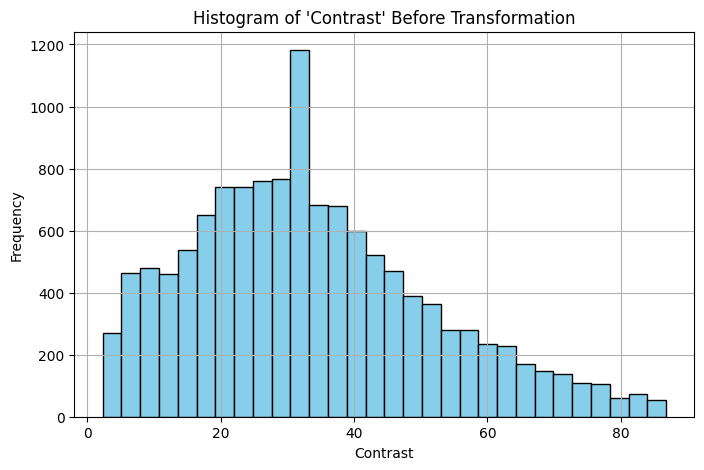

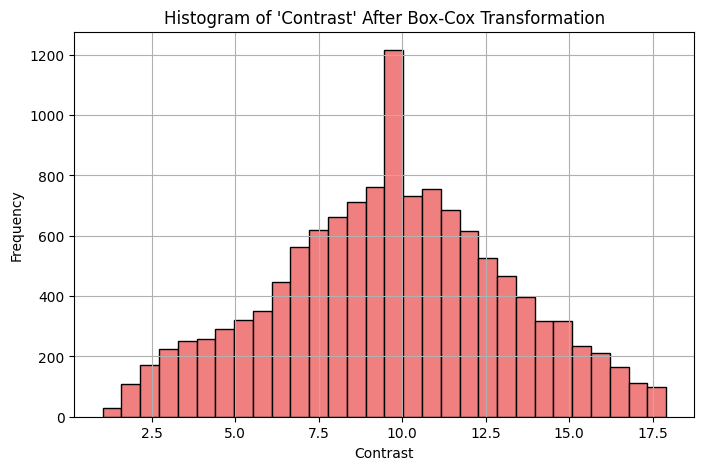

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the dataset
df = pd.read_csv('transformed_dataset.csv')  # Ensure correct path

# Step 2: Plot original histogram of 'Contrast'
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of 'Contrast' Before Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 3: Apply Box-Cox transformation (Ensure all values are positive)
min_contrast = df['Contrast'].min()
if min_contrast <= 0:
    df['Contrast'] = df['Contrast'] + abs(min_contrast) + 1  # Shift to be positive

df['Contrast'], lambda_contrast = stats.boxcox(df['Contrast'])  # Apply Box-Cox

# Step 4: Plot transformed histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Contrast'], bins=30, color='lightcoral', edgecolor='black')
plt.title("Histogram of 'Contrast' After Box-Cox Transformation")
plt.xlabel("Contrast")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Step 5: Save the dataset (Ensure only 'Contrast' column is modified)
df.to_csv('contrast_feature_dataset.csv', index=False)

# Handle Imbalanced Dataset

<ipython-input-17-773b0f4cb0c4>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y1, palette="viridis")
<ipython-input-17-773b0f4cb0c4>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y2, palette="viridis")
<ipython-input-17-773b0f4cb0c4>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y3, palette="viridis")


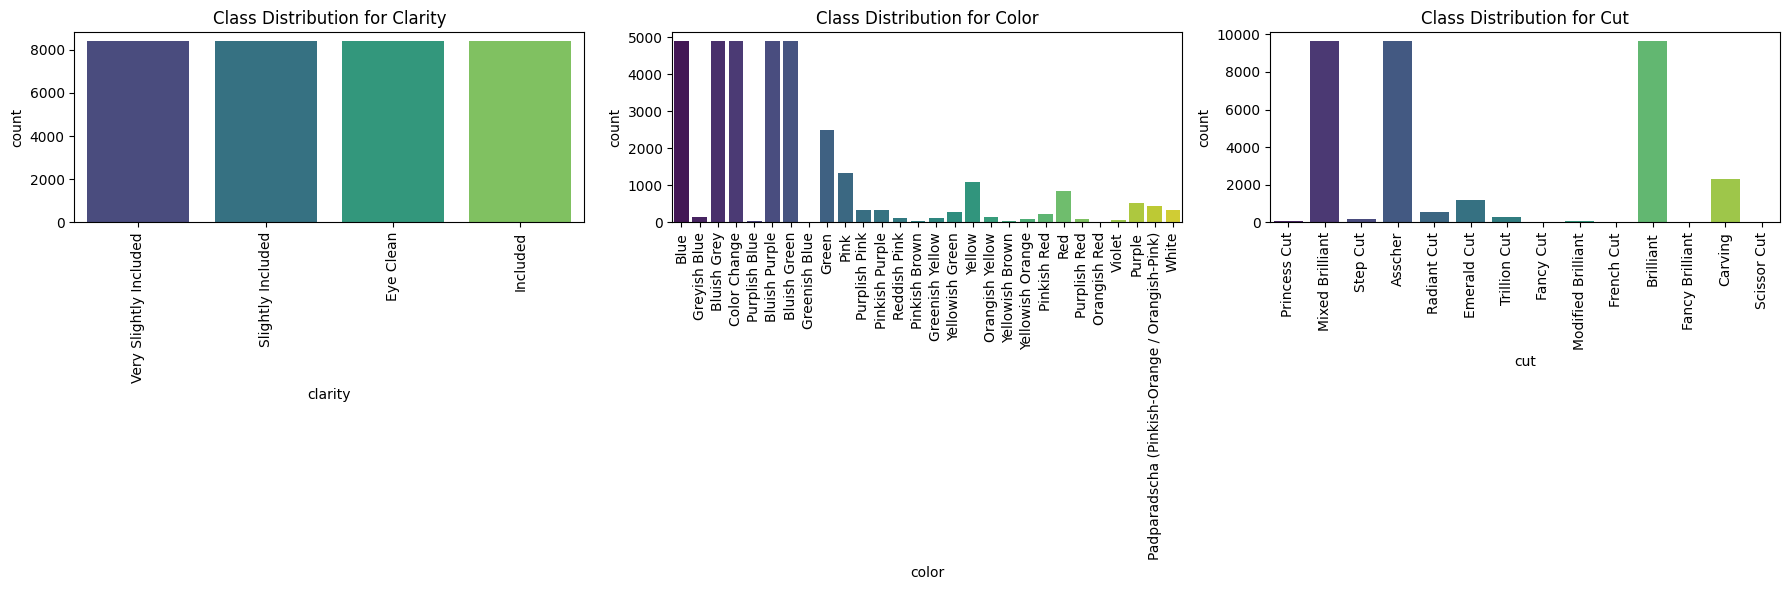

Dataset after resampling has been saved as 'resampled_dataset.csv'


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the preprocessed dataset
data = pd.read_csv('contrast_feature_dataset.csv', low_memory=False)

# Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Features (without target variables)
y = data[['clarity', 'color', 'cut']]  # Target variables

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample each target variable separately
X_resampled_clarity, y_resampled_clarity = ros.fit_resample(X, y['clarity'])
X_resampled_color, y_resampled_color = ros.fit_resample(X, y['color'])
X_resampled_cut, y_resampled_cut = ros.fit_resample(X, y['cut'])

# Combine the resampled target variables into a DataFrame
y_resampled = pd.DataFrame({
    'clarity': y_resampled_clarity,
    'color': y_resampled_color,
    'cut': y_resampled_cut
})

# Ensure that all resampled datasets have the same number of rows
min_length = min(len(y_resampled_clarity), len(y_resampled_color), len(y_resampled_cut))

X_resampled_final = X_resampled_clarity.iloc[:min_length]
y_resampled_final = y_resampled.iloc[:min_length]

# Step 2: Plot class distributions
def plot_class_distribution(y1, y2, y3):
    plt.figure(figsize=(18, 6))  # Set a large figure size for side-by-side plots

    # Plot clarity distribution
    plt.subplot(1, 3, 1)  # (rows, columns, plot number)
    sns.countplot(x=y1, palette="viridis")
    plt.title("Class Distribution for Clarity")
    plt.xticks(rotation=90)

    # Plot color distribution
    plt.subplot(1, 3, 2)
    sns.countplot(x=y2, palette="viridis")
    plt.title("Class Distribution for Color")
    plt.xticks(rotation=90)

    # Plot cut distribution
    plt.subplot(1, 3, 3)
    sns.countplot(x=y3, palette="viridis")
    plt.title("Class Distribution for Cut")
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot distributions for resampled target variables
plot_class_distribution(y_resampled_final['clarity'], y_resampled_final['color'], y_resampled_final['cut'])

# Step 3: Save the resampled dataset
final_resampled_data = pd.concat([X_resampled_final, y_resampled_final], axis=1)
final_resampled_data.to_csv('resampled_dataset.csv', index=False)

print("Dataset after resampling has been saved as 'resampled_dataset.csv'")

# Label Encode

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings

# Step 1: Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Step 2: Read the resampled CSV file (after RandomOverSampler)
data = pd.read_csv('resampled_dataset.csv', low_memory=False)  # Replace with your actual dataset path

# Step 3: Handle missing values for features before encoding
# Select columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values for numerical columns (using the mean)
numerical_cols = data[missing_columns].select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Impute missing values for categorical columns (using the mode)
categorical_cols = data[missing_columns].select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Check for missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing values after imputation (before encoding):\n", missing_values_after_imputation)

# Step 4: Separate the features (X) and target variables (y)
X = data.drop(columns=['clarity', 'color', 'cut'])  # Assuming 'clarity', 'color', 'cut' are the target columns
y = data[['clarity', 'color', 'cut']]  # The target variables

# Step 5: Handle missing values for target columns (impute with 'Unknown')
y.loc[:, 'clarity'] = y['clarity'].fillna('Unknown')
y.loc[:, 'color'] = y['color'].fillna('Unknown')
y.loc[:, 'cut'] = y['cut'].fillna('Unknown')

# Step 6: Encode categorical columns in X (features) using LabelEncoder
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in the feature set (X)
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Step 7: Encode the target variables (clarity, color, cut) using LabelEncoder
label_encoder_clarity = LabelEncoder()
label_encoder_color = LabelEncoder()
label_encoder_cut = LabelEncoder()

# Fit the encoders on the target variables
label_encoder_clarity.fit(y['clarity'])
label_encoder_color.fit(y['color'])
label_encoder_cut.fit(y['cut'])

# Use .loc to avoid SettingWithCopyWarning
y.loc[:, 'clarity'] = label_encoder_clarity.transform(y['clarity'])
y.loc[:, 'color'] = label_encoder_color.transform(y['color'])
y.loc[:, 'cut'] = label_encoder_cut.transform(y['cut'])

# Check if there are any missing values in the encoded data (features and target)
missing_values_after_encoding = pd.concat([X, y], axis=1).isnull().sum()
print("\nMissing values after encoding:\n", missing_values_after_encoding)

# Step 8: Handle missing values after encoding (if any)
# In case any new missing values appeared during encoding, we can handle them as follows:
# For numerical columns (in features):
numerical_cols_encoded = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols_encoded] = X[numerical_cols_encoded].fillna(X[numerical_cols_encoded].mean())

# For categorical columns (in features and target variables):
categorical_cols_encoded = X.select_dtypes(include=['object']).columns
for col in categorical_cols_encoded:
    X[col] = X[col].fillna(X[col].mode()[0])

# Handle missing values in target columns after encoding (if any)
y.loc[:, 'clarity'] = y['clarity'].fillna(label_encoder_clarity.classes_[0])
y.loc[:, 'color'] = y['color'].fillna(label_encoder_color.classes_[0])
y.loc[:, 'cut'] = y['cut'].fillna(label_encoder_cut.classes_[0])

# Step 9: Combine the encoded features and target variables back into a single DataFrame
encoded_data = pd.concat([X, y], axis=1)

# Step 10: Save the encoded data to a new CSV file
encoded_data.to_csv('encoded_resampled_dataset.csv', index=False)

print("\nEncoded data saved to 'encoded_resampled_dataset.csv'")

Missing values after imputation (before encoding):
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 273, dtype: int64

Missing values after encoding:
 image_name_helper    0
type                 0
shape                0
color_intensity      0
treatment            0
                    ..
B_Skewness           0
B_Kurtosis           0
clarity              0
color                0
cut                  0
Length: 273, dtype: int64

Encoded data saved to 'encoded_resampled_dataset.csv'


In [ ]:
import pandas as pd

# Step 1: Read the encoded CSV file
encoded_data = pd.read_csv('encoded_resampled_dataset.csv')  # Replace with your actual dataset path

# Step 2: Check the class distribution (balance) for 'clarity', 'color', and 'cut'
print("Class Distribution (Counts) after encoding and preprocessing:")

# For Clarity
print("Clarity:\n", encoded_data['clarity'].value_counts(), "\n")

# For Color
print("Color:\n", encoded_data['color'].value_counts(), "\n")

# For Cut
print("Cut:\n", encoded_data['cut'].value_counts(), "\n")

Class Distribution (Counts) after encoding and preprocessing:
Clarity:
 clarity
3    8392
2    8392
0    8392
1    8392
Name: count, dtype: int64 

Color:
 color
0     4889
2     4889
4     4889
3     4889
1     4889
5     2485
12    1332
24    1094
20     857
16     528
11     444
18     346
14     327
23     325
26     283
15     227
8      135
10     135
7      117
21     113
19      99
27      86
22      71
17      43
25      42
13      30
9        3
6        1
Name: count, dtype: int64 

Cut:
 cut
7     9628
0     9628
1     9628
2     2286
3     1168
10     552
13     281
12     180
9       92
8       54
5       32
4       32
11       6
6        1
Name: count, dtype: int64 



# Convert clarity, color, and cut columns into binary format - Set target Labels

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

# Step 1: Read the CSV file into a DataFrame
data = pd.read_csv('encoded_resampled_dataset.csv')

# Step 2: Initialize the MultiLabelBinarizer
mlb_clarity = MultiLabelBinarizer()
mlb_color = MultiLabelBinarizer()
mlb_cut = MultiLabelBinarizer()

# Step 3: Convert clarity, color, and cut columns into binary format
# Applying MultiLabelBinarizer for each of the labels separately
Y_clarity = mlb_clarity.fit_transform(data['clarity'].apply(lambda x: [x]))
Y_color = mlb_color.fit_transform(data['color'].apply(lambda x: [x]))
Y_cut = mlb_cut.fit_transform(data['cut'].apply(lambda x: [x]))

# Step 4: Combine these into a new DataFrame for multi-label classification
Y_clarity_df = pd.DataFrame(Y_clarity, columns=[f'clarity_{i}' for i in mlb_clarity.classes_])
Y_color_df = pd.DataFrame(Y_color, columns=[f'color_{i}' for i in mlb_color.classes_])
Y_cut_df = pd.DataFrame(Y_cut, columns=[f'cut_{i}' for i in mlb_cut.classes_])

# Step 5: Concatenate the newly created one-hot encoded columns with the original DataFrame
# Drop original columns that are being transformed (clarity, color, cut)
data_final = pd.concat([data.drop(columns=['clarity', 'color', 'cut']), Y_clarity_df, Y_color_df, Y_cut_df], axis=1)

# Step 6: Save the final DataFrame to a CSV file
data_final.to_csv('processed_data.csv', index=False)

# Step 7: Print the final DataFrame to check the result
print(data_final.head())

   image_name_helper  type  shape  color_intensity  treatment  color_group  \
0                  0     0      8               10          0            0   
1               1111     0      7                5          1            1   
2               5025     0      1                7          0            1   
3               5136     0      8               10          0            0   
4               5247     0      1                3          1            1   

   color_group_blue  color_group_blue-grey  color_group_blue-purple  \
0               1.0                    0.0                      0.0   
1               0.0                    0.0                      0.0   
2               0.0                    0.0                      0.0   
3               1.0                    0.0                      0.0   
4               0.0                    0.0                      0.0   

   color_group_brown-pink  ...  cut_4  cut_5  cut_6  cut_7  cut_8  cut_9  \
0                     0.0  .

In [ ]:
import pandas as pd

# Step 1: Read the CSV file
data = pd.read_csv('processed_data.csv')  # Replace 'your_data.csv' with the actual path to your CSV file

# Step 2: Check the columns before transformation (original categorical columns)
print("Original Columns Before Transformation:")
print(data.columns)

# Step 3: Check the first few rows before transformation
print("\nFirst Few Rows Before Transformation:")
print(data.head())

# Step 4: Check if the original categorical columns are dropped and only one-hot encoded columns remain
# Here we'll check the columns related to clarity, color, and cut to make sure they have been encoded properly
print("\nChecking for One-Hot Encoded Columns for 'clarity', 'color', 'cut':")

clarity_columns = [col for col in data.columns if 'clarity' in col]  # Find columns related to 'clarity'
color_columns = [col for col in data.columns if 'color' in col]  # Find columns related to 'color'
cut_columns = [col for col in data.columns if 'cut' in col]  # Find columns related to 'cut'

print("\nClarity One-Hot Encoded Columns:")
print(clarity_columns)

print("\nColor One-Hot Encoded Columns:")
print(color_columns)

print("\nCut One-Hot Encoded Columns:")
print(cut_columns)

# Step 5: Ensure original categorical columns are dropped
print("\nChecking if Original Categorical Columns ('clarity', 'color', 'cut') are Dropped:")
original_categorical_columns = ['clarity', 'color', 'cut']  # List of original categorical columns

# Check if any of the original categorical columns remain
remaining_columns = [col for col in original_categorical_columns if col in data.columns]
print("Remaining Original Columns (if any):", remaining_columns)

# Step 6: Verify the final DataFrame's structure and first few rows after transformation
print("\nFirst Few Rows After Transformation:")
print(data.head())

# If everything is correct, you can save the transformed DataFrame
data.to_csv('Final_processed_data.csv', index=False)

Original Columns Before Transformation:
Index(['image_name_helper', 'type', 'shape', 'color_intensity', 'treatment',
       'color_group', 'color_group_blue', 'color_group_blue-grey',
       'color_group_blue-purple', 'color_group_brown-pink',
       ...
       'cut_4', 'cut_5', 'cut_6', 'cut_7', 'cut_8', 'cut_9', 'cut_10',
       'cut_11', 'cut_12', 'cut_13'],
      dtype='object', length=316)

First Few Rows Before Transformation:
   image_name_helper  type  shape  color_intensity  treatment  color_group  \
0                  0     0      8               10          0            0   
1               1111     0      7                5          1            1   
2               5025     0      1                7          0            1   
3               5136     0      8               10          0            0   
4               5247     0      1                3          1            1   

   color_group_blue  color_group_blue-grey  color_group_blue-purple  \
0               1.0    